In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

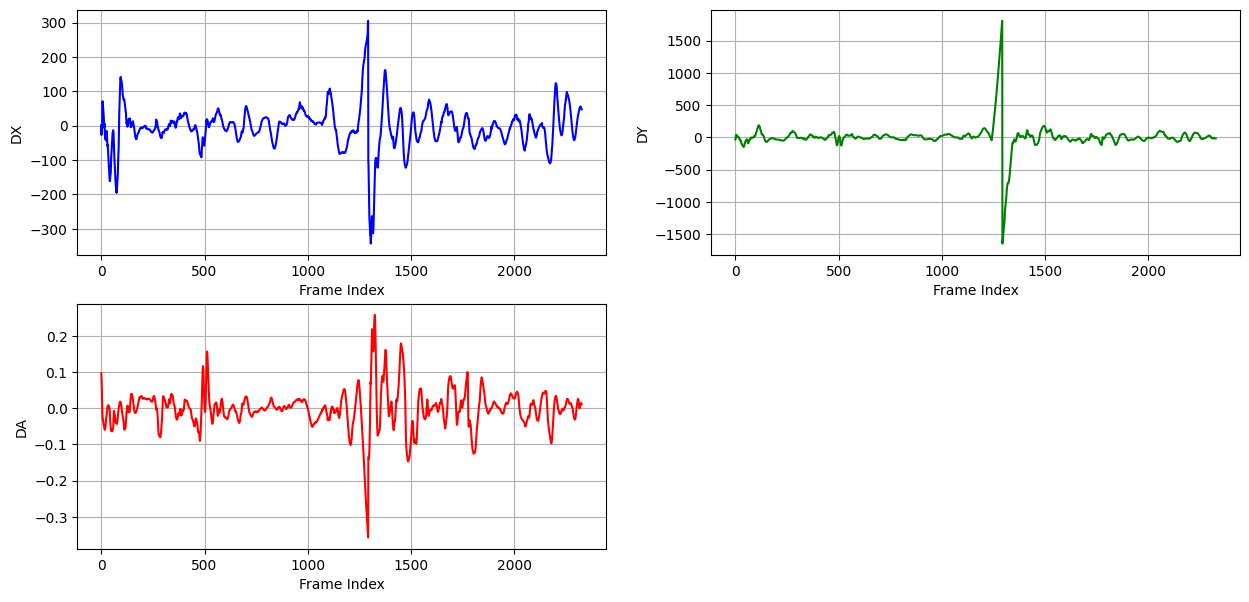

In [2]:
df = pd.read_csv('../data/stabilize_motion.csv')

# plot data frame

fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(df['frame_index'], df['stabilize_dx'], color='blue', label='DX')
ax[0, 0].set_ylabel('DX')
ax[0, 0].set_xlabel('Frame Index')
ax[0, 0].grid('on')

ax[0, 1].plot(df['frame_index'], df['stabilize_dy'], color='green', label='DY')
ax[0, 1].set_ylabel('DY')
ax[0, 1].set_xlabel('Frame Index')
ax[0, 1].grid('on')

ax[1, 0].plot(df['frame_index'], df['stabilize_da'], color='red', label='DA')
ax[1, 0].set_ylabel('DA')
ax[1, 0].set_xlabel('Frame Index')
ax[1, 0].grid('on')

ax[1, 1].remove()

fig.set_figwidth(15)
#fig.tight_layout()
fig.set_figheight(7)

plt.show()

(2327, 5)
(2153, 5)


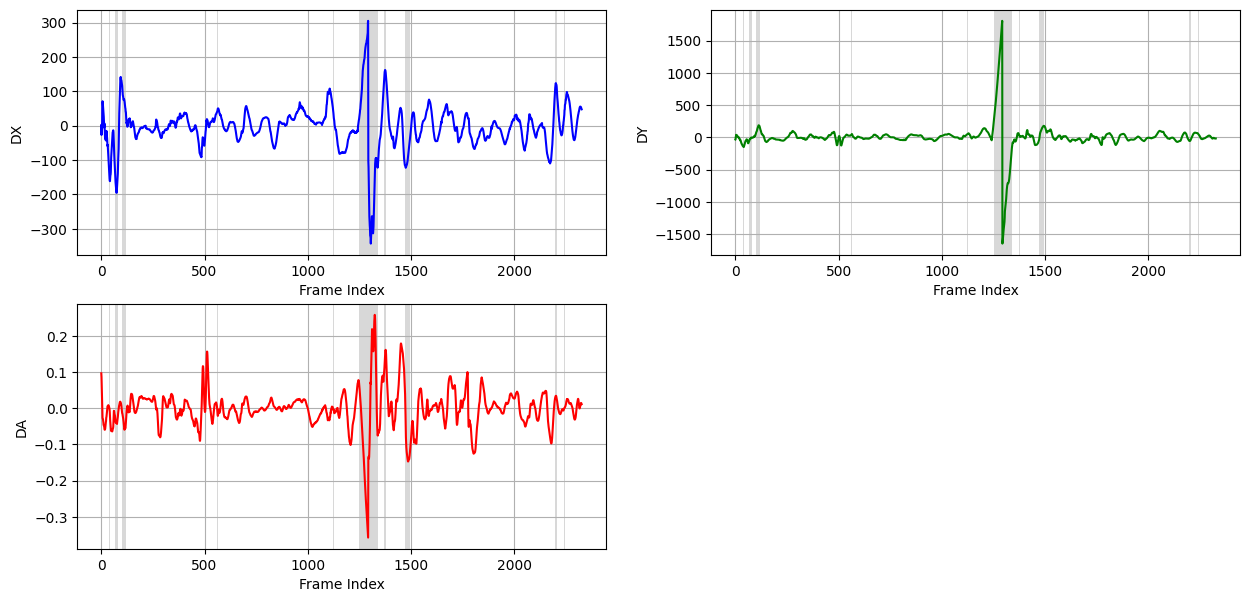

In [12]:
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor(n_neighbors=50)
#model = IsolationForest(n_estimators=100)

x_train = df[['stabilize_dx', 'stabilize_dy', 'stabilize_da']].values

outlier_factors = model.fit_predict(x_train)

df['outlier_factor'] = outlier_factors

fdf = df.query('outlier_factor == 1')

print(df.shape)
print(fdf.shape)

fig, ax = plt.subplots(2, 2)

# plot a vertical line for each outlier
for i in range(df.shape[0]):
    if df.iloc[i]['outlier_factor'] == -1:
        ax[0, 0].axvspan(df.iloc[i]['frame_index'], df.iloc[i]['frame_index']+1, facecolor='gray', alpha=0.3)
        ax[0, 1].axvspan(df.iloc[i]['frame_index'], df.iloc[i]['frame_index']+1, facecolor='gray', alpha=0.3)
        ax[1, 0].axvspan(df.iloc[i]['frame_index'], df.iloc[i]['frame_index']+1, facecolor='gray', alpha=0.3)
        # ax[0, 0].axvline(x=df.iloc[i]['frame_index'], color=(0, 0, 0), alpha=0.2)
        # ax[0, 1].axvline(x=df.iloc[i]['frame_index'], color=(0, 0, 0), alpha=0.2)
        # ax[1, 0].axvline(x=df.iloc[i]['frame_index'], color=(0, 0, 0), alpha=0.2)


ax[0, 0].plot(df['frame_index'], df['stabilize_dx'], color='blue', label='DX')
ax[0, 0].set_ylabel('DX')
ax[0, 0].set_xlabel('Frame Index')
ax[0, 0].grid('on')

ax[0, 1].plot(df['frame_index'], df['stabilize_dy'], color='green', label='DY')
ax[0, 1].set_ylabel('DY')
ax[0, 1].set_xlabel('Frame Index')
ax[0, 1].grid('on')

ax[1, 0].plot(df['frame_index'], df['stabilize_da'], color='red', label='DA')
ax[1, 0].set_ylabel('DA')
ax[1, 0].set_xlabel('Frame Index')
ax[1, 0].grid('on')

ax[1, 1].remove()

fig.set_figwidth(15)
#fig.tight_layout()
fig.set_figheight(7)

plt.show()


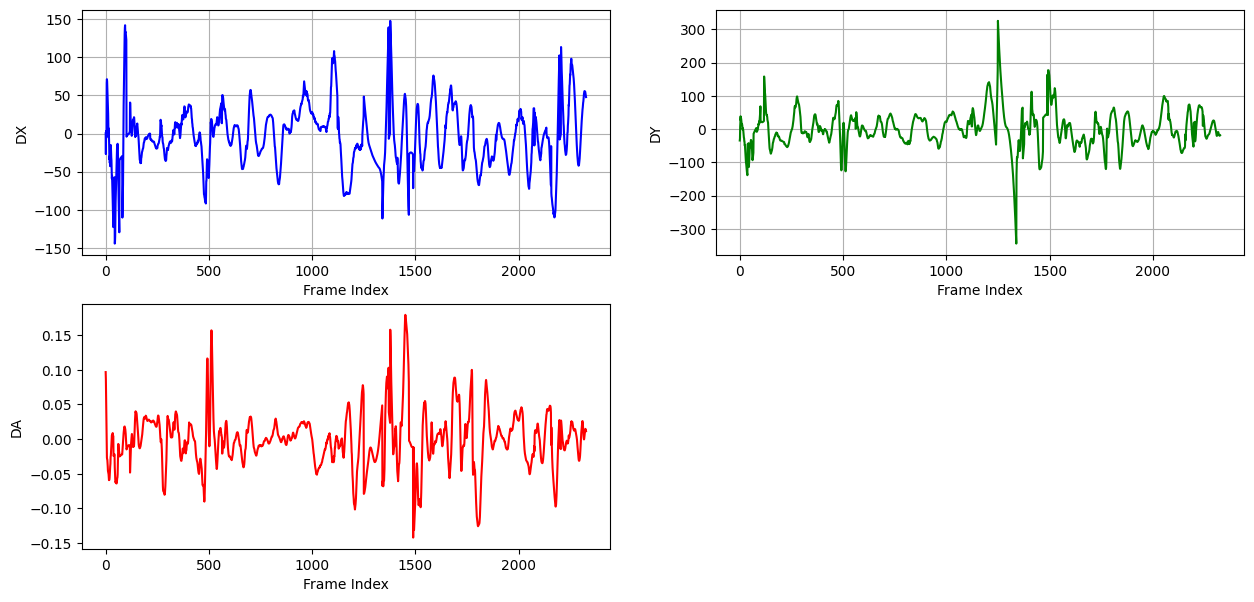

In [20]:
# contiguous groups of outliers
# https://stackoverflow.com/questions/4494404/find-large-number-of-consecutive-values-fulfilling-condition-in-a-numpy-array


# replace outliers with rolling average of 5 frames
outlier_df = df.query('outlier_factor == -1')

scaled_df = df.copy()

def get_window(dataframe, index, size):
    start = index - size
    end = index + size

    if start < 0:
        start = 0

    if end > dataframe.shape[0]:
        end = dataframe.shape[0]

    return start, end


dx_threshold = 300
dy_threshold = 300
da_threshold = 0.2

for i in range(df.shape[0]):
    # if is an outlier, replace with rolling average
    if df.iloc[i]['outlier_factor'] == -1:
        start, end = get_window(df, i, 50)
        scaled_df.loc[i, 'stabilize_dx'] = df.loc[start:end, 'stabilize_dx'].mean()
        scaled_df.loc[i, 'stabilize_dy'] = df.loc[start:end, 'stabilize_dy'].mean()
        scaled_df.loc[i, 'stabilize_da'] = df.loc[start:end, 'stabilize_da'].mean()

# plot the scaled_df
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(scaled_df['frame_index'], scaled_df['stabilize_dx'], color='blue', label='DX')
ax[0, 0].set_ylabel('DX')
ax[0, 0].set_xlabel('Frame Index')
ax[0, 0].grid('on')

ax[0, 1].plot(scaled_df['frame_index'], scaled_df['stabilize_dy'], color='green', label='DY')
ax[0, 1].set_ylabel('DY')
ax[0, 1].set_xlabel('Frame Index')
ax[0, 1].grid('on')

ax[1, 0].plot(scaled_df['frame_index'], scaled_df['stabilize_da'], color='red', label='DA')
ax[1, 0].set_ylabel('DA')
ax[1, 0].set_xlabel('Frame Index')
ax[1, 0].grid('on')

ax[1, 1].remove()

fig.set_figwidth(15)
#fig.tight_layout()
fig.set_figheight(7)

plt.show()

scaled_df.to_csv('../data/scaled_stable_motion.csv', index=False)

In [27]:
std_y = df['stabilize_dy'].std()
median_y = df['stabilize_dy'].median()

std_x = df['stabilize_dx'].std()
median_x = df['stabilize_dx'].median()

std_a = df['stabilize_da'].std()
median_a = df['stabilize_da'].median()

scaled_df = df.copy()

for row in scaled_df.iterrows():
    if row[1]['outlier_factor'] == -1:
        scaled_df.at[row[0], 'stabilize_dy'] = 0
        scaled_df.at[row[0], 'stabilize_dx'] = 0
        scaled_df.at[row[0], 'stabilize_da'] = 0
        #row[1]['stabilize_dy'] = 0
       # row[1]['stabilize_dx'] = 0
        #row[1]['stabilize_da'] = 0
        # if row[1]['stabilize_dy'] > median_y + 2 * std_y:
        #     row[1]['stabilize_dy'] = median_y + std_y
        # elif row[1]['stabilize_dy'] < median_y - 2 * std_y:
        #     row[1]['stabilize_dy'] = median_y - std_y
    
        # if row[1]['stabilize_dx'] > median_x + 2 * std_x:
        #     row[1]['stabilize_dx'] = median_x + std_x
        # elif row[1]['stabilize_dx'] < median_x - 2 * std_x:
        #     row[1]['stabilize_dx'] = median_x - std_x
    
        # if row[1]['stabilize_da'] > median_a + 2 * std_a:
        #     row[1]['stabilize_da'] = median_a + std_a
        # elif row[1]['stabilize_da'] < median_a - 2 * std_a:
        #     row[1]['stabilize_da'] = median_a - std_a

scaled_df.to_csv('scaled_stabilized.csv', index=False)

In [20]:
# create contiguous groups of outliers

groups = []
group_flag = False
group_lr = []
group_indicies = []
for i in range(0, len(outlier_factors)):
    if i == len(outlier_factors) - 1 and group_flag:
        if outlier_factors[i] == 1:
            group_lr.append(i)
        else:
            group_indicies.append(i)
        groups.append([group_lr, group_indicies])
        break
    
    if outlier_factors[i] == -1 and not group_flag:
        group_flag = True
        if i > 0:
            group_lr.append(i - 1)
        group_indicies.append(i)
    elif outlier_factors[i] == 1 and group_flag:
        group_flag = False
        group_lr.append(i)
        groups.append([group_lr, group_indicies])
        group_lr = []
        group_indicies = []
    elif outlier_factors[i] == -1 and group_flag:
        group_indicies.append(i)

print(groups)

[[[37, 44], [38, 39, 40, 41, 42, 43]], [[66, 81], [67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]], [[100, 118], [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]], [[560, 564], [561, 562, 563]], [[1122, 1126], [1123, 1124, 1125]], [[1249, 1340], [1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339]], [[1370, 1378], [1371, 1372, 1373, 1374, 1375, 1376, 1377]], [[1468, 1489], [1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483,

In [21]:
# Apply min max scaling to each outlier group
from sklearn.preprocessing import MinMaxScaler

scaled_df = df.copy()

for group in groups:
    left, right = group[0]
    indicies = group[1]

    for column in ['stabilize_dx', 'stabilize_dy', 'stabilize_da']:
        minn = min(df[column][left], df[column][right])
        maxx = fdf[column].max()
        scaler = MinMaxScaler(feature_range=(minn, maxx))

        #print(df['stabilize_dy'][indicies].values.reshape(-1, 1).shape)

        slice = df[column][indicies].values.reshape(-1, 1)
        slice = scaler.fit_transform(slice)
        scaled_df[column][indicies] = slice.flatten()
    

<ipython-input-21-182713984039>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[column][indicies] = slice.flatten()
<ipython-input-21-182713984039>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[column][indicies] = slice.flatten()
<ipython-input-21-182713984039>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[column][indicies] = slice.flatten()
<ipython-input-21-182713984039>:19: SettingWithCopyWarn

(2327, 5)
(2327, 5)


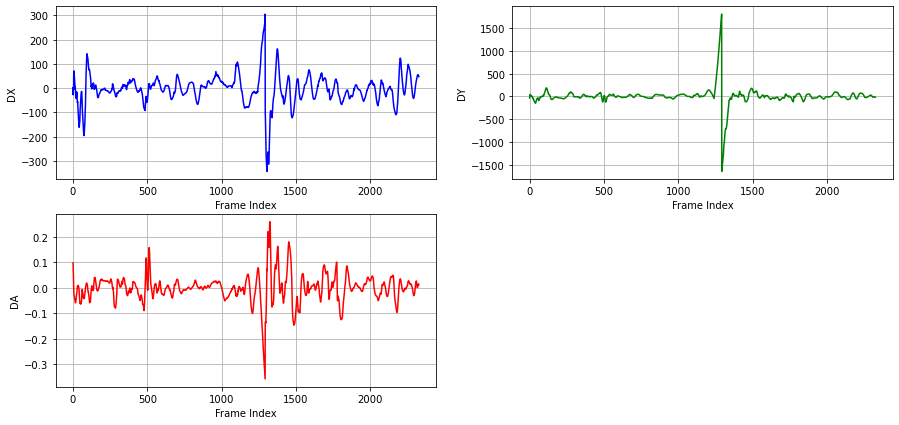

In [28]:
# plot data frame

fig, ax = plt.subplots(2, 2)

print(scaled_df.shape)
print(df.shape)

ax[0, 0].plot(scaled_df['frame_index'], scaled_df['stabilize_dx'], color='blue', label='DX')
ax[0, 0].set_ylabel('DX')
ax[0, 0].set_xlabel('Frame Index')
ax[0, 0].grid('on')

ax[0, 1].plot(scaled_df['frame_index'], scaled_df['stabilize_dy'], color='green', label='DY')
ax[0, 1].set_ylabel('DY')
ax[0, 1].set_xlabel('Frame Index')
ax[0, 1].grid('on')

ax[1, 0].plot(scaled_df['frame_index'], scaled_df['stabilize_da'], color='red', label='DA')
ax[1, 0].set_ylabel('DA')
ax[1, 0].set_xlabel('Frame Index')
ax[1, 0].grid('on')

ax[1, 1].remove()

fig.set_figwidth(15)
#fig.tight_layout()
fig.set_figheight(7)

plt.show()

In [24]:
scaled_df.to_csv('scaled_stabilized.csv', index=False)